In [357]:
#All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import textwrap
%matplotlib inline
import os
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [421]:
books_df = pd.read_csv('MA5851_engine.csv')
books_df.head(10)

C:\Users\Friday\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,COURSENAME,ITEM_COUNT,TITLE,RESOURCE_TYPE,SUBTITLE,ISBN10S,ISBN13S,ISSNS,EISSNS,DOI,EDITION,EDITORS,PUBLISHER,DATES,VOLUME,DESC
0,3,Swallowing Across The Lifespan,87.0,Archives Of Otolaryngologyâ€“head & Neck Surgery,Journal,Archives of Otolaryngologyâ€“Head & Neck Surgery,NaN,NaN,0886-4470,0886-4470,NaN,NaN,[],NaN,NaN,NaN,The contents developed are: installations of m...
1,3,Swallowing Across The Lifespan,87.0,Cold Spring Harbor Perspectives In Medicine,Journal,Cold Spring Harbor Perspectives in Medicine,NaN,NaN,NaN,2157-1422,NaN,NaN,[],NaN,NaN,NaN,NaN
2,3,Swallowing Across The Lifespan,87.0,Archives Of Internal Medicine,Journal,Archives of Internal Medicine,NaN,NaN,0003-9926,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,Embracing Diversity,53.0,Dimensions Of Adult Learning,Book,Dimensions of Adult Learning,335214487,9.78174E+12,NaN,NaN,NaN,NaN,"[{full_name:Griff Foley,type:person}]",Open University Press,2004,NaN,"Inside the hottest business, media and technol..."
4,3,Contemporary Issues In Accounting Theory (online),24.0,University Of Auckland Business Review. Autumn,Journal,University of Auckland Business Review. Autumn,NaN,NaN,1174-9946,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,3,Economics For Decision Making,17.0,The Sydney Morning Herald,Journal,The Sydney Morning Herald,NaN,NaN,0312-6315,NaN,NaN,NaN,[],NaN,NaN,NaN,"Portable, powerful, and a breeze to use, Pytho..."
6,3,Contemporary Issues In Accounting Theory (online),24.0,Critical Perspectives On Accounting,Journal,Critical Perspectives on Accounting,NaN,NaN,10452354,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
7,3,Economics For Decision Making,17.0,Business Review Weekly: Brw.,Journal,Business Review Weekly : BRW.,NaN,NaN,1989,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,3,"Borderlands Identity, Culture And Belonging",66.0,Diogenes,Journal,Diogenes,NaN,NaN,0392-1921,1467-7695,NaN,NaN,[],NaN,NaN,NaN,How is ethnicity viewed by scholars of differe...
9,3,"Borderlands Identity, Culture And Belonging",66.0,Differences: A Journal Of Feminist Cultural St...,Journal,Differences: A Journal of Feminist Cultural St...,NaN,NaN,1040-7391,1527-1986,NaN,NaN,[],NaN,NaN,NaN,NaN


In [359]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46274 entries, 0 to 46273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             46274 non-null  int64  
 1   COURSENAME     46274 non-null  object 
 2   ITEM_COUNT     37066 non-null  float64
 3   TITLE          46274 non-null  object 
 4   RESOURCE_TYPE  46274 non-null  object 
 5   SUBTITLE       46274 non-null  object 
 6   ISBN10S        13482 non-null  object 
 7   ISBN13S        19355 non-null  object 
 8   ISSNS          22015 non-null  object 
 9   EISSNS         5488 non-null   object 
 10  DOI            4864 non-null   object 
 11  EDITION        12476 non-null  object 
 12  EDITORS        42550 non-null  object 
 13  PUBLISHER      30082 non-null  object 
 14  DATES          33414 non-null  object 
 15  VOLUME         8643 non-null   object 
 16  DESC           9 non-null      object 
dtypes: float64(1), int64(1), object(15)
memory usage: 

In [360]:
# Exploratory Data Analysis

In [361]:
books_df.isnull().sum()

ID                   0
COURSENAME           0
ITEM_COUNT        9208
TITLE                0
RESOURCE_TYPE        0
SUBTITLE             0
ISBN10S          32792
ISBN13S          26919
ISSNS            24259
EISSNS           40786
DOI              41410
EDITION          33798
EDITORS           3724
PUBLISHER        16192
DATES            12860
VOLUME           37631
DESC             46265
dtype: int64

In [362]:
#From the above list we see that there are lot of NaN values, perform data clean ing for each and every column

#Selecting the columns for the jobs corpus
# For this example we only consider the columns: 'ID', 'TITLE', 'COURSENAME', 'RESOURCE_TYPE','SUBTITLE', 'ISBN10S','EDITORS'

In [363]:

cols = ['ID']+['TITLE']+['COURSENAME']+ ['RESOURCE_TYPE']+['SUBTITLE']+['ITEM_COUNT']
df_book =books_df[cols]
df_book.columns = ['ID', 'TITLE', 'COURSENAME', 'RESOURCE_TYPE', 'SUBTITLE','ITEM_COUNT']
df_book.head() 

,ID,TITLE,COURSENAME,RESOURCE_TYPE,SUBTITLE,ITEM_COUNT
0,3,Archives Of Otolaryngologyâ€“head & Neck Surgery,Swallowing Across The Lifespan,Journal,Archives of Otolaryngologyâ€“Head & Neck Surgery,87.0
1,3,Cold Spring Harbor Perspectives In Medicine,Swallowing Across The Lifespan,Journal,Cold Spring Harbor Perspectives in Medicine,87.0
2,3,Archives Of Internal Medicine,Swallowing Across The Lifespan,Journal,Archives of Internal Medicine,87.0
3,3,Dimensions Of Adult Learning,Embracing Diversity,Book,Dimensions of Adult Learning,53.0
4,3,University Of Auckland Business Review. Autumn,Contemporary Issues In Accounting Theory (online),Journal,University of Auckland Business Review. Autumn,24.0


In [364]:
# checking for the null values again.
df_book.isnull().sum()

ID                  0
TITLE               0
COURSENAME          0
RESOURCE_TYPE       0
SUBTITLE            0
ITEM_COUNT       9208
dtype: int64

In [365]:
# Let´s check the NA's by plotting them

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

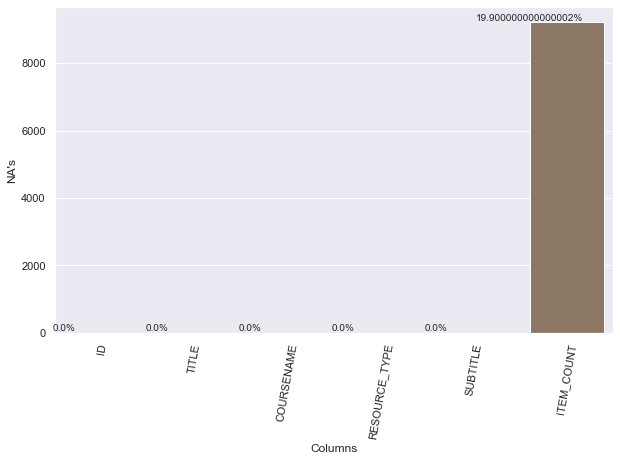

In [366]:
x = df_book.columns
y = df_book.isnull().sum()
plt.figure(figsize=(10,6))
sb.set()
sb.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(),
            height + 2,
            str(100*round(int(height)/df_book.shape[0], 3)) +"%",
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)


In [367]:
# selecting NaN rows of Title

df_nan_title = df_book[pd.isnull(df_book['TITLE'])]
print(df_nan_title.shape)
df_nan_title.head()


(0, 6)


,ID,TITLE,COURSENAME,RESOURCE_TYPE,SUBTITLE,ITEM_COUNT


In [368]:
# Creating the jobs corpus

#combining the columns of TITLE, COURSENAME, RESOURCE_TYPE

df_book["SUBTITLE"] =df_book["TITLE"] +" "+ df_book["COURSENAME"] +" "+ df_book["RESOURCE_TYPE"] +" "+ df_book["SUBTITLE"]
df_book.head(2)

<ipython-input-368-c0298683772f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["SUBTITLE"] =df_book["TITLE"] +" "+ df_book["COURSENAME"] +" "+ df_book["RESOURCE_TYPE"] +" "+ df_book["SUBTITLE"]


,ID,TITLE,COURSENAME,RESOURCE_TYPE,SUBTITLE,ITEM_COUNT
0,3,Archives Of Otolaryngologyâ€“head & Neck Surgery,Swallowing Across The Lifespan,Journal,Archives Of Otolaryngologyâ€“head & Neck Surge...,87.0
1,3,Cold Spring Harbor Perspectives In Medicine,Swallowing Across The Lifespan,Journal,Cold Spring Harbor Perspectives In Medicine Sw...,87.0


In [369]:
df_ID = df_book[['ID', 'TITLE', 'COURSENAME']]

df_ID = df_ID.fillna(" ")

df_ID.head()

,ID,TITLE,COURSENAME
0,3,Archives Of Otolaryngologyâ€“head & Neck Surgery,Swallowing Across The Lifespan
1,3,Cold Spring Harbor Perspectives In Medicine,Swallowing Across The Lifespan
2,3,Archives Of Internal Medicine,Swallowing Across The Lifespan
3,3,Dimensions Of Adult Learning,Embracing Diversity
4,3,University Of Auckland Business Review. Autumn,Contemporary Issues In Accounting Theory (online)


In [370]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [371]:
df_book.shape

(46274, 6)

C:\Users\Friday\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Friday\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

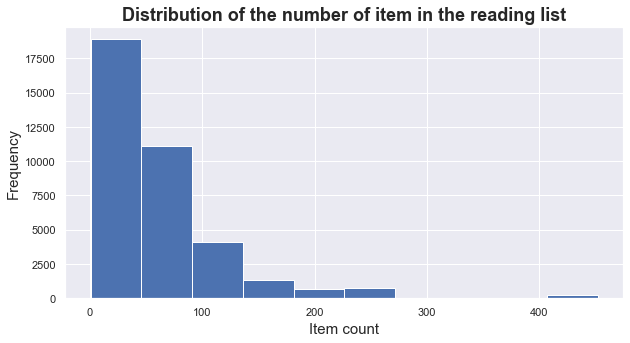

In [422]:
#Histogram:
plt.figure(figsize=[10,5])
plt.hist(data=df_book, x='ITEM_COUNT')
plt.title('Distribution of the number of item in the reading list', size=18, fontweight='bold')
plt.xlabel('Item count', size=15)
plt.ylabel('Frequency', size=15)

In [373]:
#Fixing the threshold:
threshold=np.median(df_book['ITEM_COUNT'].value_counts().index)
#Subset of the dataset based on the threshold:
data=df_book.loc[df_book.ITEM_COUNT >= threshold]

#Combining titles and subtitle: 
data['TITLE_Y']=[','.join(i) for i in list(zip(data['TITLE'],data['SUBTITLE']))]

<ipython-input-373-ac483a06a8cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TITLE_Y']=[','.join(i) for i in list(zip(data['TITLE'],data['SUBTITLE']))]


Text(0, 0.5, 'Count')

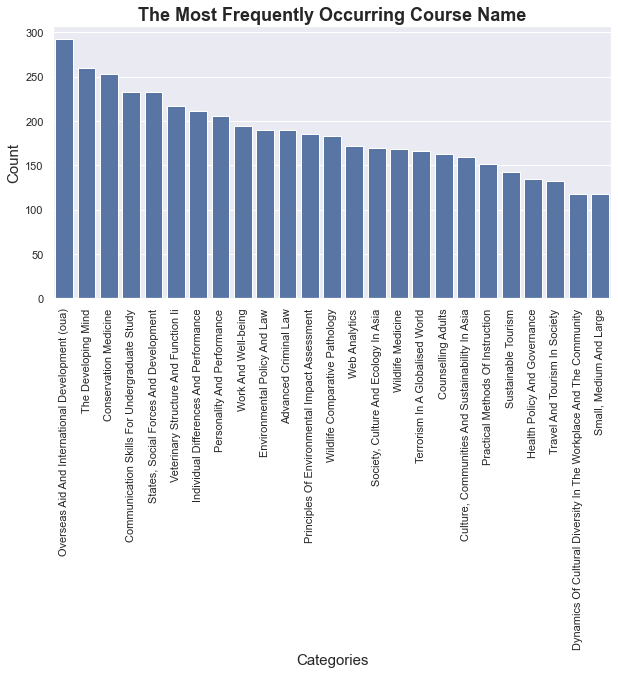

In [423]:
plt.figure(figsize = [10,5])
color_base = sb.color_palette()[0]
sb.barplot(books_df.COURSENAME.value_counts().head(25).index, books_df.COURSENAME.value_counts().head(25).values, color=color_base)
plt.xticks(rotation = 'vertical')
plt.title('The Most Frequently Occurring Course Name', fontweight = 'bold', size = 18)
plt.xlabel('Categories', size = 15)
plt.ylabel('Count', size = 15)

Text(0, 0.5, 'ITEM_COUNT')

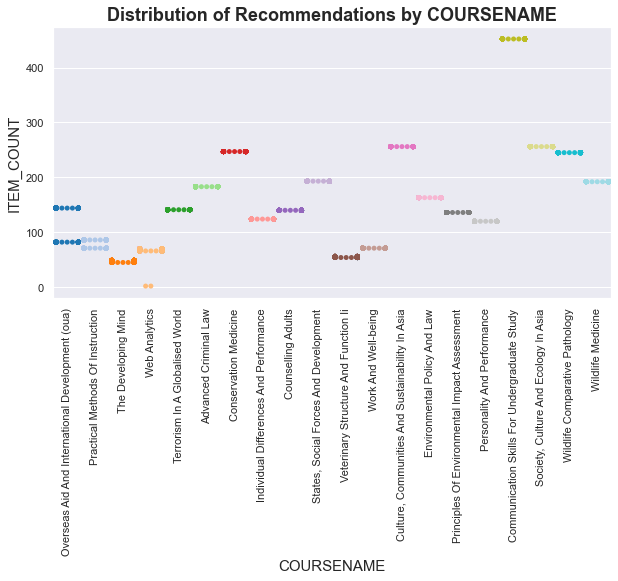

In [375]:
cat = df_book.COURSENAME.value_counts().head(20).index
fig, ax = plt.subplots(figsize = [10,5])
sb.swarmplot(data = df_book[df_book.COURSENAME.isin(cat)], x = 'COURSENAME', y = 'ITEM_COUNT', palette = 'tab20')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Distribution of Recommendations by COURSENAME', fontweight = 'bold', size = 18)
ax.set_xlabel('COURSENAME',  size = 15)
ax.set_ylabel('ITEM_COUNT',  fontsize = 15)

In [376]:
df_book.dropna()


,ID,TITLE,COURSENAME,RESOURCE_TYPE,SUBTITLE,ITEM_COUNT
0,3,Archives Of Otolaryngologyâ€“head & Neck Surgery,Swallowing Across The Lifespan,Journal,Archives Of Otolaryngologyâ€“head & Neck Surge...,87.0
1,3,Cold Spring Harbor Perspectives In Medicine,Swallowing Across The Lifespan,Journal,Cold Spring Harbor Perspectives In Medicine Sw...,87.0
2,3,Archives Of Internal Medicine,Swallowing Across The Lifespan,Journal,Archives Of Internal Medicine Swallowing Acros...,87.0
3,3,Dimensions Of Adult Learning,Embracing Diversity,Book,Dimensions Of Adult Learning Embracing Diversi...,53.0
4,3,University Of Auckland Business Review. Autumn,Contemporary Issues In Accounting Theory (online),Journal,University Of Auckland Business Review. Autumn...,24.0
...,...,...,...,...,...,...
37061,2,Data Analysis And Decision Making,Quantitative Methods For Risk Analysis,Book,Data Analysis And Decision Making Quantitative...,10.0
37062,2,Basic Business Statistics : Concepts And Appli...,Quantitative Methods For Risk Analysis,Book,Basic Business Statistics : Concepts And Appli...,10.0
37063,2,Microsoft Excel 2010: Illustrated Complete,Quantitative Methods For Risk Analysis,Book,Microsoft Excel 2010: Illustrated Complete Qua...,10.0
37064,2,Bird By Bird: Some Instructions On Writing And...,Honours Social Sciences Research Methods,Book,Bird By Bird: Some Instructions On Writing And...,27.0


In [425]:
# Recommendations based on rating counts
rating_count = pd.DataFrame(df_book.groupby('TITLE')['RESOURCE_TYPE'].count())
rating_count.sort_values('RESOURCE_TYPE', ascending=False).head()

,RESOURCE_TYPE
TITLE,
Nan,267
Harvard Business Review,239
Annals Of Tourism Research,54
Environmental And Planning Law Journal,51
New Media & Society,51


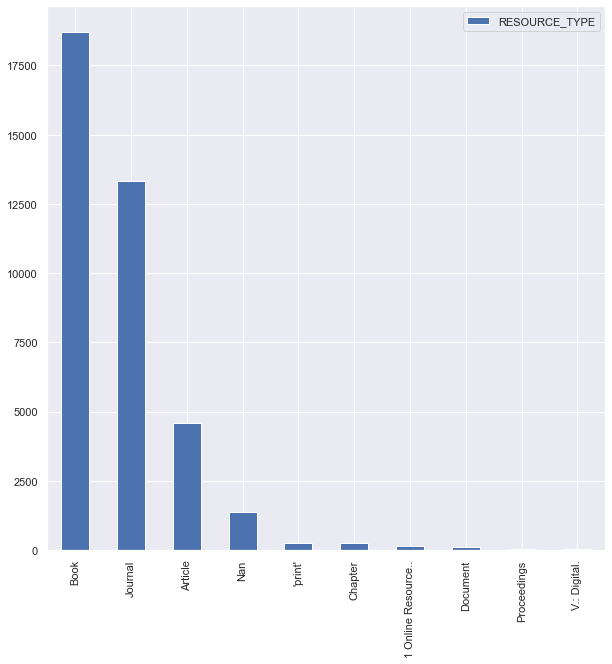

In [378]:
books_df['RESOURCE_TYPE'].value_counts().head(10).plot(kind = 'bar', figsize=(10, 10)).legend()
plt.show()

In [379]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(TITLE):
    
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",TITLE)
  text=re.sub("(\\d|\\W)+"," ",TITLE) 
  text = text.replace("nbsp", "")
  clean_text = [lemmatizer(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]

In [380]:
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))

In [448]:
#Fixing the threshold:
threshold=np.median(books_df['ITEM_COUNT'].value_counts().index)
#Subset of the dataset based on the threshold:
data=books_df.loc[books_df.ITEM_COUNT >= threshold]


In [382]:
# Select only "Applicant.ID" and "COURSENAME" columns:

df_final_d= df_ID[['ID','COURSENAME']]
df_final_d.head()

,ID,COURSENAME
0,3,Swallowing Across The Lifespan
1,3,Swallowing Across The Lifespan
2,3,Swallowing Across The Lifespan
3,3,Embracing Diversity
4,3,Contemporary Issues In Accounting Theory (online)


In [383]:
df_final_d.columns = ['ID','COURSENAME']
df_final_d.head()

,ID,COURSENAME
0,3,Swallowing Across The Lifespan
1,3,Swallowing Across The Lifespan
2,3,Swallowing Across The Lifespan
3,3,Embracing Diversity
4,3,Contemporary Issues In Accounting Theory (online)


In [384]:
u = 2
index = np.where(df_final_d['ID'] == u)[0][0]
user_r = df_final_d.iloc[[index]]
user_r

,ID,COURSENAME
488,2,Overseas Aid And International Development (oua)


In [454]:

#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((books_df['COURSENAME'])) #fitting and transforming the vector
tfidf_jobid

<46274x1964 sparse matrix of type '<class 'numpy.float64'>'
	with 178610 stored elements in Compressed Sparse Row format>

In [455]:
from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_r['COURSENAME'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [456]:
output2 = list(cos_similarity_tfidf)

In [388]:

def get_recommendation(top, df_book, scores):
  recommendation = pd.DataFrame(columns = ['ID', 'RESOURCE_TYPE','TITLE', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'ID'] = u
      recommendation.at[count, 'RESOURCE_TYPE'] = books_df['RESOURCE_TYPE'][i]
      recommendation.at[count, 'TITLE'] = books_df['TITLE'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [389]:
## The top recommendations using TF-IDF

top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top,books_df, list_scores)

,ID,RESOURCE_TYPE,TITLE,score
0,2,Journal,Annual Review Of Anthropology,1
1,2,Journal,International Sociology,1
2,2,Journal,Critical Social Policy,1
3,2,Journal,Urban Affairs Review,1
4,2,Article,Community Capacity Building Or State Opportunism?,1
5,2,Journal,Journal Of Refugee Studies,1
6,2,Article,An Essay On The Meaning(s) Of Â€œcapacity Buil...,1
7,2,Article,Sustainable Development: Mapping Different App...,1
8,2,Article,Does Fair Trade Make A Difference? The Case Of...,1
9,2,Journal,The Journal Of Development Studies,1


In [390]:
# The top recommendations using CountVectorizer

In [391]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_jobid = count_vectorizer.fit_transform((books_df['COURSENAME'])) #fitting and transforming the vector
count_jobid

<46274x1964 sparse matrix of type '<class 'numpy.int64'>'
	with 178610 stored elements in Compressed Sparse Row format>

In [449]:
from sklearn.metrics.pairwise import cosine_similarity
user_count = count_vectorizer.transform(user_r['COURSENAME'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_count, x),count_jobid)


In [450]:
# The top recommendations using CountVectorizer

top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, books_df, list_scores)

,ID,RESOURCE_TYPE,TITLE,score
0,2,Journal,Annual Review Of Anthropology,1
1,2,Journal,International Sociology,1
2,2,Journal,Critical Social Policy,1
3,2,Journal,Urban Affairs Review,1
4,2,Article,Community Capacity Building Or State Opportunism?,1
5,2,Journal,Journal Of Refugee Studies,1
6,2,Article,An Essay On The Meaning(s) Of Â€œcapacity Buil...,1
7,2,Article,Sustainable Development: Mapping Different App...,1
8,2,Article,Does Fair Trade Make A Difference? The Case Of...,1
9,2,Journal,The Journal Of Development Studies,1


In [394]:
## Top 10  Recommender  Using KNN

from sklearn.neighbors import NearestNeighbors
n_neighbors = 11
KNN = NearestNeighbors(n_neighbors, p=2)
KNN.fit(tfidf_jobid)
NNs = KNN.kneighbors(user_tfidf, return_distance=True) 

C:\Users\Friday\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
# The top recommendations using KNN

In [445]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

get_recommendation(top, books_df, index_score)

,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,0
1,2,Journal,Tourism Geographies,0
2,2,Article,Post-development And Its Discontents,0
3,2,Article,Neoliberalism In Action,0
4,2,Journal,Public Culture,0
5,2,Article,Beyond The State And Failed Schemes,0
6,2,Book,Whose Development?: An Ethnography Of Aid,0
7,2,Journal,Anthropology Of Work Review,0
8,2,Journal,The Review Of Economic Studies,0
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0


In [ ]:
# Section 2 Subsetting the data into training and test

In [438]:
y=df_book.COURSENAME
x=df_book
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.head()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32391 entries, 18251 to 44113
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             32391 non-null  int64  
 1   TITLE          32391 non-null  object 
 2   COURSENAME     32391 non-null  object 
 3   RESOURCE_TYPE  32391 non-null  object 
 4   SUBTITLE       32391 non-null  object 
 5   ITEM_COUNT     25938 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


In [439]:
x_test.head()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13883 entries, 5822 to 512
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             13883 non-null  int64  
 1   TITLE          13883 non-null  object 
 2   COURSENAME     13883 non-null  object 
 3   RESOURCE_TYPE  13883 non-null  object 
 4   SUBTITLE       13883 non-null  object 
 5   ITEM_COUNT     11128 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 759.2+ KB


In [440]:
## The top recommendations using TF-IDF for train data 70% subset 

get_recommendation(top, x_train, list_scores)


,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,1
1,2,Journal,Tourism Geographies,1
2,2,Article,Post-development And Its Discontents,1
3,2,Article,Neoliberalism In Action,1
4,2,Journal,Public Culture,1
5,2,Article,Beyond The State And Failed Schemes,1
6,2,Book,Whose Development?: An Ethnography Of Aid,1
7,2,Journal,Anthropology Of Work Review,1
8,2,Journal,The Review Of Economic Studies,0.48301
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0.48301


In [441]:
## The top recommendations using TF-IDF for test data 20% subset

get_recommendation(top,x_test, list_scores)


,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,1
1,2,Journal,Tourism Geographies,1
2,2,Article,Post-development And Its Discontents,1
3,2,Article,Neoliberalism In Action,1
4,2,Journal,Public Culture,1
5,2,Article,Beyond The State And Failed Schemes,1
6,2,Book,Whose Development?: An Ethnography Of Aid,1
7,2,Journal,Anthropology Of Work Review,1
8,2,Journal,The Review Of Economic Studies,0.48301
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0.48301


In [442]:
# The top recommendations using CountVectorizer for train data

get_recommendation(top, x_train, list_scores)

,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,1
1,2,Journal,Tourism Geographies,1
2,2,Article,Post-development And Its Discontents,1
3,2,Article,Neoliberalism In Action,1
4,2,Journal,Public Culture,1
5,2,Article,Beyond The State And Failed Schemes,1
6,2,Book,Whose Development?: An Ethnography Of Aid,1
7,2,Journal,Anthropology Of Work Review,1
8,2,Journal,The Review Of Economic Studies,0.48301
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0.48301


In [443]:
# The top recommendations using CountVectorizer for test data

get_recommendation(top, x_test, list_scores)

,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,1
1,2,Journal,Tourism Geographies,1
2,2,Article,Post-development And Its Discontents,1
3,2,Article,Neoliberalism In Action,1
4,2,Journal,Public Culture,1
5,2,Article,Beyond The State And Failed Schemes,1
6,2,Book,Whose Development?: An Ethnography Of Aid,1
7,2,Journal,Anthropology Of Work Review,1
8,2,Journal,The Review Of Economic Studies,0.48301
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0.48301


In [446]:
## Top 10  Recommender  Using KNN for train 
get_recommendation(top, x_train, index_score)


,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,0
1,2,Journal,Tourism Geographies,0
2,2,Article,Post-development And Its Discontents,0
3,2,Article,Neoliberalism In Action,0
4,2,Journal,Public Culture,0
5,2,Article,Beyond The State And Failed Schemes,0
6,2,Book,Whose Development?: An Ethnography Of Aid,0
7,2,Journal,Anthropology Of Work Review,0
8,2,Journal,The Review Of Economic Studies,0
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0


In [447]:
## Top 10  Recommender  Using KNN for train 
get_recommendation(top, x_train, index_score)


,ID,RESOURCE_TYPE,TITLE,score
0,2,Article,Beyond The Social Contract: Capabilities And G...,0
1,2,Journal,Tourism Geographies,0
2,2,Article,Post-development And Its Discontents,0
3,2,Article,Neoliberalism In Action,0
4,2,Journal,Public Culture,0
5,2,Article,Beyond The State And Failed Schemes,0
6,2,Book,Whose Development?: An Ethnography Of Aid,0
7,2,Journal,Anthropology Of Work Review,0
8,2,Journal,The Review Of Economic Studies,0
9,2,Article,Buying Innocence: Child-sex Tourists In Thailand,0
